# K-Means CLustering

In [105]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

## k-Means on a randomly generated dataset

Let's create our own dataset for this lab!

First we need to set a random seed. Use numpy's random.seed() function, where the seed will be set to 0.

In [2]:
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

- n_samples: The total number of points equally divided among clusters.
    - Value will be: 5000
- centers: The number of centers to generate, or the fixed center locations.
    - Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
- cluster_std: The standard deviation of the clusters.
    - Value will be: 0.9

Output

- X: Array of shape [n_samples, n_features]. (Feature Matrix)
    - The generated samples.
- y: Array of shape [n_samples]. (Response Vector)
    - The integer labels for cluster membership of each sample.

In [14]:
X , y = make_blobs(n_samples = 5000, centers = [[4,4], [-2,1], [2, -3], [1,1]], cluster_std = 0.9)
X[0:5, :]

array([[-1.81005236,  0.57273435],
       [-0.3887384 ,  1.93320291],
       [ 0.80057104, -3.46116803],
       [-3.10542395,  1.18626136],
       [ 3.29878803, -3.54440129]])

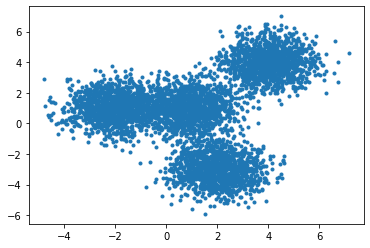

In [17]:
plt.scatter(X[:,0], X[:, 1], marker = '.')

## Setting up K-Means

Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:

- init: Initialization method of the centroids.
    - Value will be: "k-means++"
- k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    - n_clusters: The number of clusters to form as well as the number of centroids to generate.
    - Value will be: 4 (since we have 4 centers)
- n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    - Value will be: 12

Initialize KMeans with these parameters, where the output parameter is called k_means.

In [18]:
k_means = KMeans(init="k-means++", n_clusters = 4, n_init=12)

In [19]:
k_means

KMeans(n_clusters=4, n_init=12)

In [20]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [27]:
k_means_labels = k_means.labels_
k_means_labels[0:25]

array([0, 3, 2, 0, 2, 2, 0, 3, 2, 3, 3, 0, 3, 2, 2, 0, 3, 2, 2, 3, 3, 1,
       1, 2, 0])

In [28]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.06544231,  1.0427265 ],
       [ 3.99829441,  3.96934387],
       [ 2.0158184 , -3.0233543 ],
       [ 0.9701681 ,  1.01832861]])

## Creating the Visual Plot

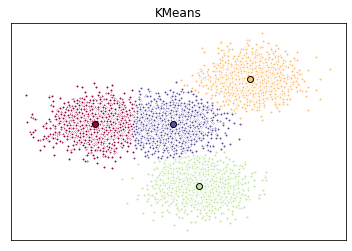

In [60]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


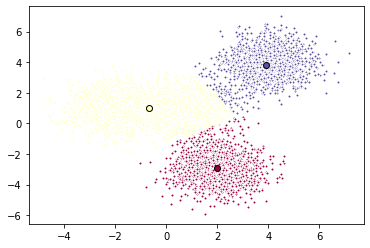

In [67]:
k_means3 = KMeans(init='k-means++', n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1 )
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize= 6)

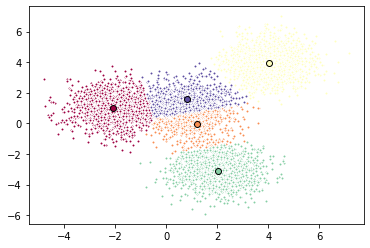

In [96]:
k_means5 = KMeans(init='k-means++', n_clusters = 5, n_init=12)
k_means5.fit(X)
fig = plt.figure(figsize=(6,4))

colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means5.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means5.cluster_centers_)), colors):
    my_members = (k_means5.labels_ == k)
    cluster_center = k_means5.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor='k', markersize = 6)

# Customer Segmentation with K-Means

In [108]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Pre-processing

As you can see, Address in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.

In [109]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalizing over the standard deviation

In [128]:
from sklearn.preprocessing import StandardScaler

X = df.values[:, 1:]

np.unique(np.isnan(X))

truecount = (np.isnan(X) == True).sum()
falsecount = (np.isnan(X) == False).sum()
print(truecount, falsecount)

X = np.nan_to_num(X)
truecount = (np.isnan(X) == True).sum()
falsecount = (np.isnan(X) == False).sum()
print(truecount, falsecount)

Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset


150 6650
0 6800
[[41.     2.     6.    ...  1.073  0.     6.3  ]
 [47.     1.    26.    ...  8.218  0.    12.8  ]
 [33.     2.    10.    ...  5.802  1.    20.9  ]
 ...
 [25.     4.     0.    ...  3.21   1.    33.4  ]
 [32.     1.    12.    ...  0.696  0.     2.9  ]
 [52.     1.    16.    ...  3.638  0.     8.6  ]]


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modeling

In [129]:
kmeans = KMeans(init='k-means++', n_clusters = 3, n_init=12)
kmeans

KMeans(n_clusters=3, n_init=12)

In [132]:
kmeans.fit(X)
labels = kmeans.labels_
labels

array([2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,

### Insights

We assign the labels to each row in dataframe.

In [133]:
df['Clus_km'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


### We can easily check the centroid values by averaging the features in each cluster.

In [134]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


### Now, let's look at the distribution of customers based on their age and income:

In [139]:
#Age
X[0:5, 0]

array([41., 47., 33., 29., 47.])

In [140]:
#Income
X[0:5, 3]

array([ 19., 100.,  57.,  19., 253.])

In [141]:
X[0:5, 1]

array([2., 1., 2., 2., 1.])

In [142]:
np.pi

3.141592653589793

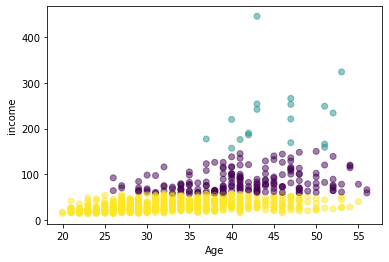

In [155]:
plt.scatter(X[:, 0], X[:, 3] , c=labels.astype(np.float), alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('income')
plt.show()

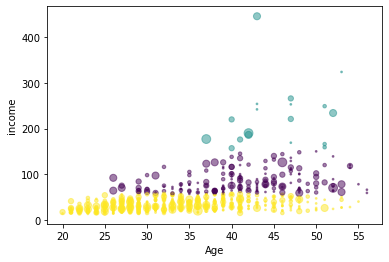

In [156]:
area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3] , s = area, c=labels.astype(np.float), alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('income')
plt.show()

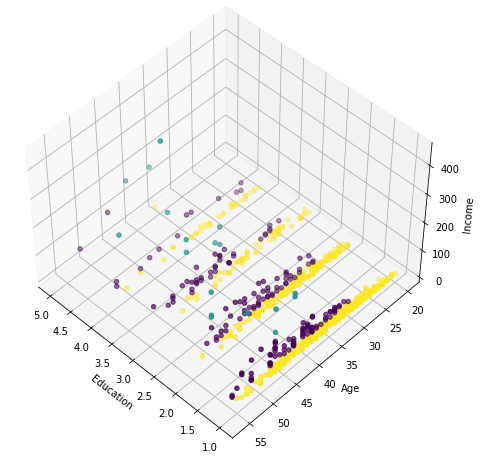

In [174]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
